In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing # label encoder
from sklearn.neighbors import KNeighborsClassifier #Import knearest neighbors Classifier model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB #Import Gaussian Naive Bayes model
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
import sklearn.tree as tree #import visualizing decision tree
import pydotplus
from six import StringIO 
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier #Import Random Forest Model
from sklearn import svm #Import svm model

In [3]:
# Load bank dataset

dataset = pd.read_csv('./dataset/bank-additional-full.csv', sep = ';')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# creating labelEncoder
le = preprocessing.LabelEncoder()

# convert text to numerical category
dataset[['job','marital','education','default','housing','loan','contact','month','day_of_week',
         'poutcome','y']] = dataset[['job','marital','education','default','housing','loan','contact','month','day_of_week',
         'poutcome','y']].apply(le.fit_transform)

In [7]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


Melakukan preprocessing data dengan memisahkan data training dan data test yang akan digunakan nanti.

In [8]:
x = dataset.drop(['y'], axis=1)
y = dataset[['y']]

In [9]:
# Split dataset menjadi dua, yaitu data training set and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) # 70% training and 30% test
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [10]:
# Melakukan standarisasi data training

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# Logistic Regression

In [11]:
# Create model

model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [12]:
# Testing the dataset

x_test = scaler.transform(x_test)

In [13]:
# Prediksi output

y_pred = model.predict(x_test)
print(y_pred)
print('nilai akurasi pembuatan model menggunakan data training sebesar', model.score(x_train, y_train))
print('nilai akurasi pembuatan model menggunakan data testing sebesar', model.score(x_test, y_test))

[0 0 0 ... 0 0 0]
nilai akurasi pembuatan model menggunakan data training sebesar 0.9102701952759182
nilai akurasi pembuatan model menggunakan data testing sebesar 0.9122764425022255


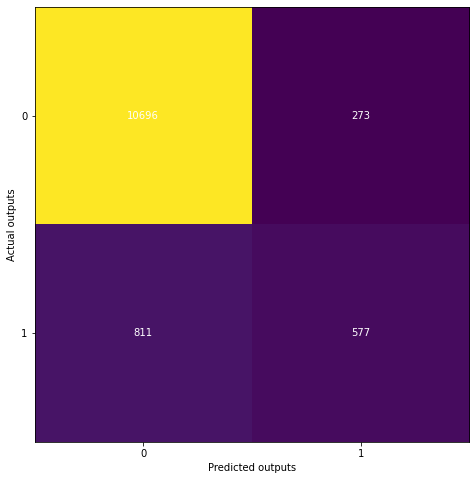

In [14]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [15]:
# Summary model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10969
           1       0.68      0.42      0.52      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



# K-Nearest Neighbor (KNN)

In [16]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 25):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

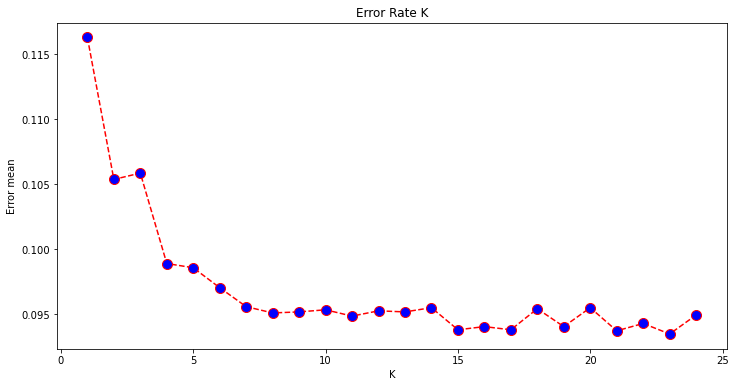

In [17]:
# plotting error rate K-means

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 25), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

In [18]:
# Create KNN Classifier

knn = KNeighborsClassifier(n_neighbors=15)

# Train model using the training sets
knn.fit(x_train, y_train)

# Predict response for test dataset
y_pred1 = knn.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.9062070081735049


# Naive Bayes Classifier

In [19]:
# Create a Gaussian Classifier
gnb = GaussianNB()

# Train model using the training sets
gnb.fit(x_train, y_train)

# Predict response for test dataset
y_pred2 = gnb.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.8477785870356883


# Decision Tree Classifier

In [20]:
feature_cols = list(dataset[dataset.columns[:-1]])

In [22]:
# Create Decision Tree Classifer
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

# Predict response for test dataset
y_pred3 = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.9030509023225702


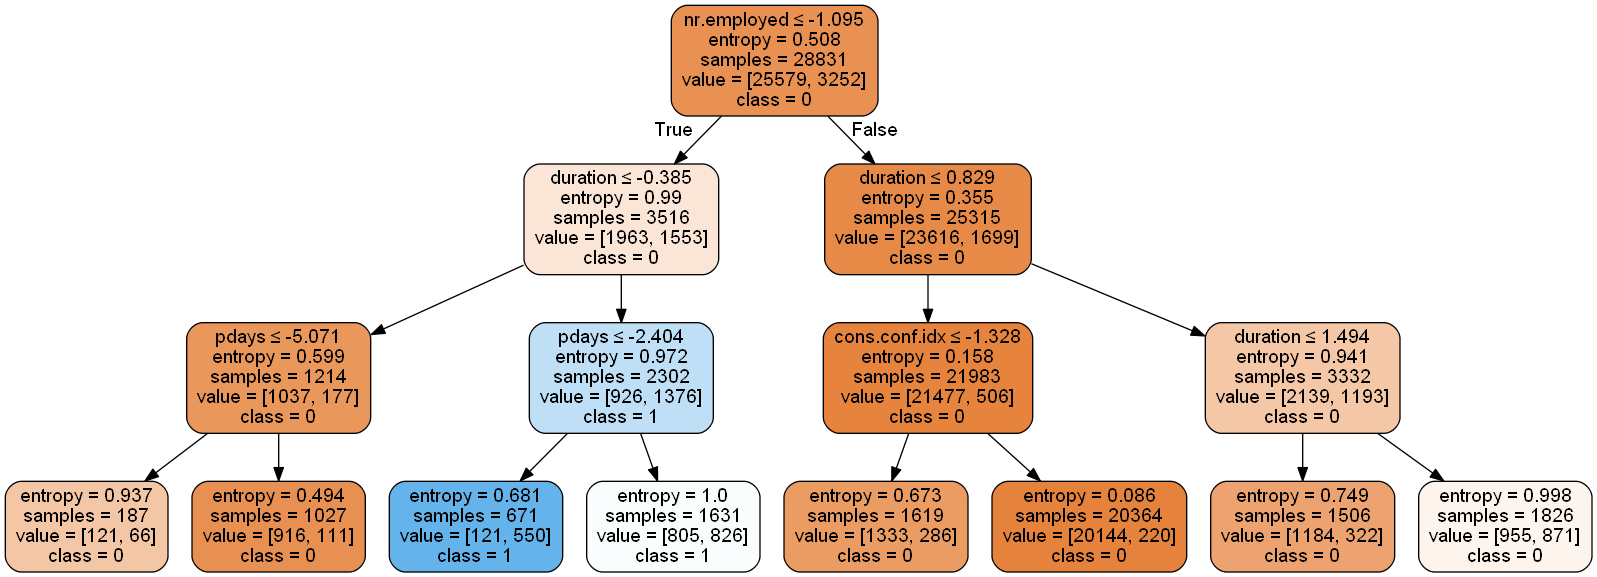

In [23]:
# Visualizing Decision Trees

dot_data = StringIO()
tree.export_graphviz(clf, 
 out_file=dot_data, 
 class_names=['0','1'], # the target names.
 feature_names=feature_cols, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

# Random Forest

In [24]:
# Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)
 
# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train) 

y_pred4 = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

Accuracy: 0.9149469936068625


No handles with labels found to put in legend.


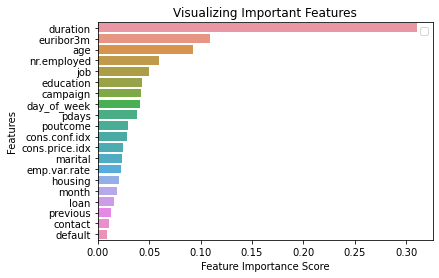

In [25]:
# Finding Important Features

feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False) 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Support Vector Machines (SVM)

In [26]:
# Create a SVM Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train model using the training sets
clf.fit(x_train, y_train) 

# Predict response for test dataset
y_pred5 = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred5))

Accuracy: 0.898761835396941


In [28]:
# Cek precision and recall model
# Model Precision: what percentage of positive tuples are labeled as such?

print("Precision:", metrics.precision_score(y_test, y_pred5)) 

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred5))

Precision: 0.6170940170940171
Recall: 0.2600864553314121


# Summary Model Accuracy

In [29]:
print("Logistic Regression:", accuracy_score(y_test, y_pred))
print("Decision Tree:", accuracy_score(y_test, y_pred1))
print("Random Forest:", accuracy_score(y_test, y_pred2))
print("SVM:", accuracy_score(y_test, y_pred3))
print("Naive Bayes:", accuracy_score(y_test, y_pred4))
print("KNN:", accuracy_score(y_test, y_pred5))

Logistic Regression: 0.9122764425022255
Decision Tree: 0.9062070081735049
Random Forest: 0.8477785870356883
SVM: 0.9030509023225702
Naive Bayes: 0.9149469936068625
KNN: 0.898761835396941


Berdasarkan hasil analisis yang telah dilakukan, diketahui bahwa model dengan menggunakan algoritma Naive Bayes memiliki tingkat akurasi paling tinggi jika dibandingkan dengan model yang lain. Sehingga dapat disimpulkan algoritma Naive Bayes tepat digunakan dalam memprediksi client dari sebuah institusi di Portugal akan mengajukan bank term deposit atau tidak, berdasarkan dari 20 parameter yang ada sesuai data